# 读入数据

In [ ]:
!pip install dask

In [17]:
import dask.dataframe as dd

In [26]:
ddf=dd.read_csv('./data/*',dtype={'Unnamed: 0': 'object',
                                  'extra': 'float64',
                                  'likenum': 'float64',
                                  'pid': 'object',
                                  'reply': 'float64',
                                  'timestamp': 'float64',
                                 'url':'object','tag':'object'})

In [27]:
df=ddf.compute()

In [28]:
df2=pd.read_csv('./neijuan_hole_drop.csv')

In [29]:
df=df.append(df2)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95308 entries, 0 to 95307
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  95157 non-null  object        
 1   pid         95308 non-null  float64       
 2   text        94308 non-null  object        
 3   type        95282 non-null  object        
 4   timestamp   95308 non-null  float64       
 5   reply       95308 non-null  float64       
 6   likenum     95308 non-null  float64       
 7   extra       95308 non-null  float64       
 8   url         7850 non-null   object        
 9   tag         1 non-null      object        
 10  tokens      95308 non-null  object        
 11  time        95282 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 8.7+ MB


In [31]:
df[df.pid=='text']=np.hstack([np.nan,np.nan,df[df.pid=='text'].values[0][:-2]])

df.to_csv('9w.csv',index=False)

In [3]:
import pandas as pd 

In [4]:
df=pd.read_csv('9w.csv')

# 数据处理

In [ ]:
!pip install pkuseg

In [ ]:
!pip install gensim

In [7]:
import pkuseg
import os
from gensim.models import Word2Vec,word2vec
from functools import reduce

In [6]:
seg = pkuseg.pkuseg()           # 加载web模型
stop_dir='./stopwords/' #链接: https://pan.baidu.com/s/1lkpBp8JDTN14-Gnczi6_nA  密码: u21o--来自百度网盘超级会员V3的分享

#加载停用词
def read_f(file):
    if '.txt' not in file: 
        return []
    with open(file) as f: 
        stop_l=[i.strip('\n') for i in f.readlines()]
    return stop_l

stop_l=reduce(lambda x,y: x+y,map(read_f,[stop_dir+t for t in os.listdir(stop_dir)]))

def my_cut(sentence):
    if pd.isna(sentence) or len(sentence)==0:
        return []
    return [i for i in seg.cut(sentence) if i not in stop_l]

In [7]:
res_sr=df.text.apply(my_cut)

In [9]:
df['tokens']=res_sr

In [10]:
with open('word2vec_content_all.txt','w+') as f:
    [f.write(' '.join(i)+'\n') for i in res_sr]
    #[f.write(' '.join(i)+'\n') for i in res_sr2]

In [11]:
import time 

import numpy as np

def time_converter(timestamp):
    if pd.isna(timestamp):
        return np.nan
    local_time=time.localtime(timestamp)
    str_time='%s-%s-%s %s:%s:%s'%(local_time.tm_year,local_time.tm_mon,local_time.tm_mday,local_time.tm_hour,local_time.tm_min,local_time.tm_sec)
    return pd.to_datetime(str_time)

In [12]:
time_sr_=df.timestamp.apply(time_converter)

In [14]:
df['time']=time_sr_

In [17]:
df.to_csv('processed_.csv',index=False)

# 演化分析

In [22]:
with open('word2vec_content_before_2021.txt','w+') as f:
    [f.write(' '.join(i)+'\n') for i in df[df.time<='2021'].tokens]

In [23]:
with open('word2vec_content_after_2021.txt','w+') as f:
    [f.write(' '.join(i)+'\n') for i in df[df.time>'2021'].tokens]

In [33]:
def find_token(x,token='内卷'):
    return True if token in x else False

In [38]:
contain_df=df[df.tokens.apply(find_token)]

In [40]:
contain_df[contain_df.time>'2021']

,Unnamed: 0,pid,text,type,timestamp,reply,likenum,extra,url,tag,tokens,time
8760,40,2172865.0,我真的觉得化院李娜老师的定分课不是一般人能听懂的，虽然我已经退出了内卷（绩点3.0-），但好...,text,1.616571e+09,21.0,10.0,0.0,NaN,NaN,"[真的, 化院, 李娜, 老师, 定分课, 听懂, 退出, 内卷, 绩点, 3.0-）, 好...",2021-03-24 15:25:50
9547,195,2173619.0,作为生化环材的一员，我觉得虽然劝退生化环材一点问题都没有，但是现在畸形的疯狂劝进金融计算机是...,text,1.616587e+09,34.0,19.0,0.0,NaN,NaN,"[生化, 环材, 员, 劝退, 生化, 环材, 一点, 畸形, 疯狂, 劝进, 金融, 计算...",2021-03-24 20:03:40
10446,57,2187686.0,#内卷##焦虑#\nhttps://www.wjx.cn/hj/myalk1wnrkm9qy...,image,1.617013e+09,1.0,1.0,370655.0,c2b1f52b0289f26e4ab307fc231f2f1dbbdffed0_1242x...,NaN,"[内卷, 焦虑, https, www.wjx.cn/hj/myalk1wnrkm9qywa...",2021-03-29 18:08:41
11902,87,2189111.0,lb老师如此深谙内卷的发生机制，却还是想看我们变成半狼半羊😓,text,1.617066e+09,2.0,1.0,0.0,NaN,NaN,"[lb, 老师, 深谙, 内卷, 发生, 机制, 想, 半, 狼, 半, 羊, 😓]",2021-03-30 08:52:23
12283,58,2189484.0,关于法理和债法，说实话，dz算是很认真地看了阅读材料，有问题就会问清楚的类型，感觉这学期的课...,text,1.617074e+09,8.0,17.0,0.0,NaN,NaN,"[法理, 债法, 说, 实话, dz, 算是, 阅读, 材料, 问, 类型, 感觉, 学期,...",2021-03-30 11:16:51
...,...,...,...,...,...,...,...,...,...,...,...,...
95302,NaN,2169048.0,2021年3月23日9:13，lb委员长主持召开第一届北大内卷会议第一次线下会议，会议上lb...,text,1.616464e+09,7.0,10.0,0.0,NaN,NaN,"[2021年, 3月, 23日, 9:13, lb委员长, 主持, 第一, 届, 北大, 内...",2021-03-23 09:46:56
95303,NaN,2169043.0,内卷叫内卷已经揭示了人被框定在某种外部结构里。人们并不是怕竞争或者怕努力，而主要是讨厌第一人...,text,1.616464e+09,14.0,7.0,0.0,NaN,NaN,"[内卷, 内卷, 揭示, 框定, 某种, 外部, 结构, 里, 怕, 竞争, 怕, 努力, ...",2021-03-23 09:43:35
95305,NaN,2168980.0,内卷之所以叫内卷，这个词就揭示了这种状态的成因是某种外部结构。,text,1.616463e+09,1.0,6.0,0.0,NaN,NaN,"[内卷, 内卷, 词, 揭示, 状态, 成因, 某种, 外部, 结构]",2021-03-23 09:25:45
95306,NaN,2168940.0,lb：自然状态就是内卷。,text,1.616462e+09,0.0,1.0,0.0,NaN,NaN,"[lb, 自然, 状态, 内卷]",2021-03-23 09:15:53


## 情绪

In [41]:
senti_df=pd.read_csv('./BosonNLP_sentiment_score/BosonNLP_sentiment_score.txt',sep=' ',header=None,names=['word','sentiment'])

def calc_senti_score(tokens):
    return senti_df[senti_df.word.isin(tokens)].sentiment.sum()

In [76]:
senti_df[senti_df.word.isin(['天赋'])]

,word,sentiment
66456,天赋,0.942287


In [62]:
score1=contain_df[contain_df.time<='2021'].tokens.apply(calc_senti_score).mean()

In [63]:
score2=contain_df[contain_df.time>'2021'].tokens.apply(calc_senti_score).mean()

In [70]:
score_sr=pd.Series([score1,score2],index=['before 2021','after 2021'],name='情绪得分')

In [ ]:
!pip install plotly

In [6]:
import plotly.express as px

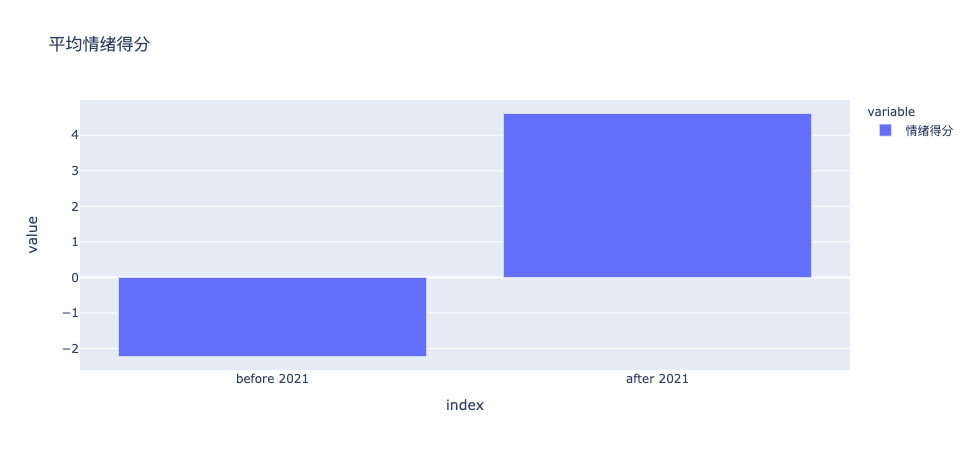

In [71]:
px.bar(score_sr,title='平均情绪得分')

In [ ]:
!pip install pyecharts

## 词云

In [44]:
from pyecharts.charts import *
from pyecharts import options as opts

In [34]:
#sentences_1=word2vec.Text8Corpus('./word2vec_content_before_2021.txt')
#sentences_2=word2vec.Text8Corpus('./word2vec_content_after_2021.txt')
#
#w2v_model_1=Word2Vec(sentences=sentences_1,min_count=2,window=5,vector_size=50)
#w2v_model_2=Word2Vec(sentences=sentences_2,min_count=2,window=5,vector_size=50)
#
#w2v_model_1.save('word2vec_1.model')
#w2v_model_2.save('word2vec_2.model')
w2v_model_1=Word2Vec.load('word2vec_1.model')
w2v_model_2=Word2Vec.load('word2vec_2.model')

In [35]:
word='内卷'

res_wc_1=w2v_model_1.wv.similar_by_word(word,topn=100)
res_wc_2=w2v_model_2.wv.similar_by_word(word,topn=100)

In [36]:
stop_=['尤其是','足以','比作','中都','件','点','前','总','长','三','二','买','月','这几天','nvpy','一点']
res_wc_clr_1=[c for c in res_wc_1 if c[0] not in stop_ ]
res_wc_clr_2=[c for c in res_wc_2 if c[0] not in stop_ ]

In [37]:
res_wc_clr_1[:10]

[('压力', 0.9920461773872375),
 ('动', 0.9919614195823669),
 ('报告', 0.9919500946998596),
 ('呜呜', 0.9916808009147644),
 ('打算', 0.9916243553161621),
 ('久', 0.9916175603866577),
 ('安排', 0.9913498163223267),
 ('靠谱', 0.9912594556808472),
 ('网上', 0.9912579655647278),
 ('尴尬', 0.991205096244812)]

In [38]:
res_wc_clr_2[:10]

[('思想', 0.9502297639846802),
 ('思考', 0.9381075501441956),
 ('逻辑', 0.9346541166305542),
 ('评判', 0.9321199059486389),
 ('观点', 0.9273241758346558),
 ('学术界', 0.9253350496292114),
 ('清晰', 0.9225746989250183),
 ('思维', 0.9208759069442749),
 ('天赋', 0.9180813431739807),
 ('形态', 0.9159897565841675)]

In [ ]:
wc1 = (
    WordCloud().add('%s词云图'%word,res_wc_clr_1)
)
wc1.render('%s_wc_1.html'%word)

wc2 = (
    WordCloud().add('%s词云图'%word,res_wc_clr_2)
)
wc2.render('%s_wc_2.html'%word)